# Modeling Classification Notebook

## Introduction

In this notebook, we will build and evaluate several **classification models** to predict whether a stock will **outperform the S&P 500 by more than 2%**. The models we train will be based on the financial indicators we've cleaned, engineered, and processed in the previous steps. By comparing multiple machine learning algorithms, we aim to identify the most effective model for predicting stock performance.

### Project Goal

The ultimate goal of this project is to build a machine learning model that can select stocks with a high likelihood of outperforming the S&P 500 by more than 2%. By successfully predicting stock outperformance, we aim to create a portfolio that consistently beats the market.

### Key Models We Will Evaluate:
1. **Logistic Regression**: A simple, interpretable baseline model.
2. **Decision Trees**: A tree-based model that splits the data into smaller subsets to make predictions based on learned rules.
3. **Random Forest Classifier**: A decision-tree-based ensemble model that provides feature importance.
4. **Gradient Boosting Models (XGBoost, LightGBM)**: Advanced models designed to handle complex patterns and interactions.
5. **Support Vector Machines (SVM)**: A model that finds the optimal boundary between outperforming and underperforming stocks.
6. **K-Nearest Neighbors (KNN)**: A simple model that classifies based on the similarity to neighboring stocks.
7. **Artificial Neural Networks (Sequential ANN)**: A deep learning model that captures non-linear relationships in the data.

### Steps in This Notebook:
- **Model Training**: We will train each model on the dataset.
- **Model Evaluation**: Using metrics such as **accuracy**, **precision**, **recall**, **F1 score**, and **AUC-ROC**, we will evaluate each model’s performance.
- **Model Comparison**: We will compare the results from each model to identify which one provides the best prediction accuracy for stock outperformance.

Once the best-performing model is identified, we will proceed to **hyperparameter tuning** in a separate notebook to further optimize the model's performance.


### Importing Libraries

In [40]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
import lightgbm as lgb

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns

import logging 

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6237707218239884583
xla_global_id: -1
]
Num GPUs Available:  0


I0000 00:00:1727450871.213397   25437 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-27 11:27:51.214296: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
I0000 00:00:1727450871.272468   25437 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-0

### Loading Dataset

In [3]:
df = pd.read_csv('data/cleaned_data/modeling_data/full_Financial_Data_for_modeling.csv')
df.head()

,symbol,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,...,Sector_Consumer Defensive,Sector_Energy,Sector_Financial Services,Sector_Healthcare,Sector_Industrials,Sector_Real Estate,Sector_Technology,Sector_Unknown,Sector_Utilities,Sector_Consumer Services
0,0HRJ.L,2000.0,1.756821e+08,114315.0,245707600.0,387966250.0,88063455.0,1.483007e+09,777669500.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1,0HST.L,2000.0,2.700000e+07,0.0,27000000.0,387966250.0,88063455.0,1.168000e+09,777669500.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,0JVQ.L,2000.0,1.756821e+08,114315.0,245707600.0,160985000.0,88063455.0,1.483007e+09,777669500.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0KXA.L,2000.0,1.756821e+08,0.0,190000000.0,387966250.0,88063455.0,1.483007e+09,777669500.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,0LWH.L,2000.0,1.140000e+08,0.0,114000000.0,387966250.0,88063455.0,1.483007e+09,777669500.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.columns.tolist()

['symbol',
 'year',
 'cashAndCashEquivalents',
 'shortTermInvestments',
 'cashAndShortTermInvestments',
 'netReceivables',
 'otherCurrentAssets',
 'totalCurrentAssets',
 'propertyPlantEquipmentNet',
 'goodwill',
 'goodwillAndIntangibleAssets',
 'taxAssets',
 'otherNonCurrentAssets',
 'totalNonCurrentAssets',
 'accountPayables',
 'shortTermDebt',
 'taxPayables',
 'otherCurrentLiabilities',
 'totalCurrentLiabilities',
 'deferredRevenueNonCurrent',
 'deferrredTaxLiabilitiesNonCurrent',
 'totalNonCurrentLiabilities',
 'totalLiabilities',
 'preferredStock',
 'commonStock',
 'retainedEarnings',
 'totalStockholdersEquity',
 'totalInvestments',
 'totalDebt',
 'minorityInterest',
 'capitalLeaseObligations',
 'totalEquity',
 'revenue',
 'costOfRevenue',
 'grossProfit',
 'grossProfitRatio',
 'ResearchAndDevelopmentExpenses',
 'GeneralAndAdministrativeExpenses',
 'SellingAndMarketingExpenses',
 'SellingGeneralAndAdministrativeExpenses',
 'otherExpenses',
 'operatingExpenses',
 'costAndExpenses',
 

#### Decide training, validation and test set

In [5]:
df.shape

(134450, 227)

In [10]:
for year in range(2000, 2023):
    y_data = df[df['year'] == year] 
    print(f'Shape for year {year}: {y_data.shape}')

Shape for year 2000: (2396, 227)
Shape for year 2001: (2540, 227)
Shape for year 2002: (2797, 227)
Shape for year 2003: (2951, 227)
Shape for year 2004: (3095, 227)
Shape for year 2005: (3291, 227)
Shape for year 2006: (3598, 227)
Shape for year 2007: (3691, 227)
Shape for year 2008: (3763, 227)
Shape for year 2009: (3953, 227)
Shape for year 2010: (4208, 227)
Shape for year 2011: (4325, 227)
Shape for year 2012: (4901, 227)
Shape for year 2013: (5428, 227)
Shape for year 2014: (5661, 227)
Shape for year 2015: (6109, 227)
Shape for year 2016: (6555, 227)
Shape for year 2017: (7449, 227)
Shape for year 2018: (7946, 227)
Shape for year 2019: (8981, 227)
Shape for year 2020: (10433, 227)
Shape for year 2021: (10923, 227)
Shape for year 2022: (9905, 227)


In [15]:
# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')

def preprocess_data(full_df, target_col='Outperform', drop_cols=['PRICE VAR [%]', 'class', 'symbol']):
    """
    Preprocess the dataset by splitting into training, validation, and test sets,
    and standardizing features with StandardScaler (no SMOTE).
    
    Parameters:
    - full_df: pd.DataFrame, the full merged dataset
    - target_col: str, the target variable name ('Outperform')
    - drop_cols: list, columns to drop due to data leakage or irrelevance
    
    Returns:
    - X_train_scaled, X_val_scaled, X_test_scaled: scaled feature matrices for train, validation, and test sets
    - y_train, y_val, y_test: target variables for train, validation, and test sets
    - scaler: the StandardScaler object fitted on the training data
    """
    
    # Split the data by year ranges
    train_years = list(range(2000, 2017))
    val_years = [2017, 2018]
    test_years = list(range(2019, 2023))
    
    # Create train, validation, and test sets
    train_data = full_df[full_df['year'].isin(train_years)]
    val_data = full_df[full_df['year'].isin(val_years)]
    test_data = full_df[full_df['year'].isin(test_years)]
    
    logging.info(f"Training data size: {train_data.shape}")
    logging.info(f"Validation data size: {val_data.shape}")
    logging.info(f"Test data size: {test_data.shape}")
    
    # Drop the columns that may cause data leakage and separate target
    X_train = train_data.drop(columns=drop_cols + [target_col])
    y_train = train_data[target_col]
    
    X_val = val_data.drop(columns=drop_cols + [target_col])
    y_val = val_data[target_col]
    
    X_test = test_data.drop(columns=drop_cols + [target_col])
    y_test = test_data[target_col]
    
    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test, scaler



def train_and_evaluate_model(model, X_train, y_train, X_val, y_val):
    """
    Train the model and evaluate it on validation data, including confusion matrix and classification report.
    
    Parameters:
    - model: the machine learning model to train
    - X_train: training features
    - y_train: training labels
    - X_val: validation features
    - y_val: validation labels
    
    Returns:
    - classification report and confusion matrix
    """
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on validation data
    y_pred = model.predict(X_val)
    
    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f"Confusion Matrix for {model.__class__.__name__}")
    plt.show()
    
    # Classification Report
    report = classification_report(y_val, y_pred)
    print(f"Classification Report for {model.__class__.__name__}:\n")
    print(report)
    
    return y_pred

# Run
# Assuming you have imported the preprocess_data function already

# Load the full dataset (this should have been done previously)
# Example (ensure your 'full_df' contains the necessary data):
# full_df = pd.read_csv('path_to_your_full_dataset.csv')

# Preprocess the data
X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test, scaler = preprocess_data(df)
# Example to see the first 5 rows of the training set
print("First 5 rows of the scaled training set:")

X_train_scaled[:5]


2024-09-27 11:55:32,563 - Training data size: (69262, 227)
2024-09-27 11:55:32,564 - Validation data size: (15395, 227)
2024-09-27 11:55:32,564 - Test data size: (40242, 227)


First 5 rows of the scaled training set:


array([[-1.96213657,  0.3967275 , -0.45760293, ..., -0.06348165,
        -0.16997984,  0.        ],
       [-1.96213657, -0.48676733, -0.46432118, ..., -0.06348165,
        -0.16997984,  0.        ],
       [-1.96213657,  0.3967275 , -0.45760293, ..., -0.06348165,
        -0.16997984,  0.        ],
       [-1.96213657,  0.3967275 , -0.46432118, ..., -0.06348165,
        -0.16997984,  0.        ],
       [-1.96213657,  0.0302019 , -0.46432118, ..., -0.06348165,
        -0.16997984,  0.        ]])

### 1. Logistic Regression: Model Evaluation

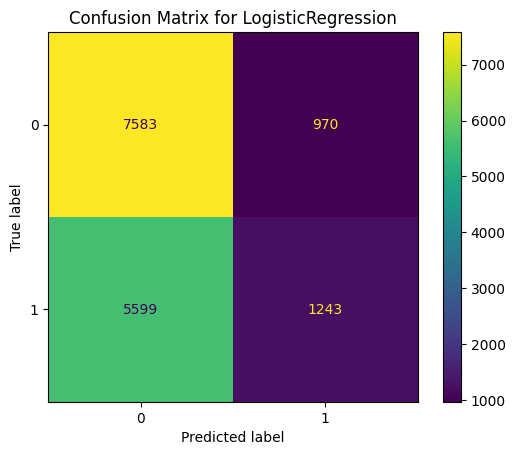

Classification Report for LogisticRegression:

              precision    recall  f1-score   support

         0.0       0.58      0.89      0.70      8553
         1.0       0.56      0.18      0.27      6842

    accuracy                           0.57     15395
   macro avg       0.57      0.53      0.49     15395
weighted avg       0.57      0.57      0.51     15395



In [17]:
# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Call the function to train and evaluate the model
y_pred_log_reg = train_and_evaluate_model(log_reg, X_train_scaled, y_train, X_val_scaled, y_val)


### 2. Decision Tree Classifier: Model Evaluation


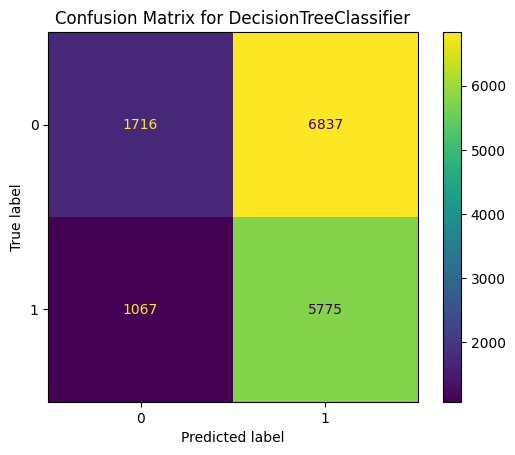

Classification Report for DecisionTreeClassifier:

              precision    recall  f1-score   support

         0.0       0.62      0.20      0.30      8553
         1.0       0.46      0.84      0.59      6842

    accuracy                           0.49     15395
   macro avg       0.54      0.52      0.45     15395
weighted avg       0.55      0.49      0.43     15395



In [18]:
# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Call the function to train and evaluate the model
y_pred_dt = train_and_evaluate_model(dt,  X_train_scaled, y_train, X_val_scaled, y_val)

### 3. Random Forest Classifier: Model Evaluation


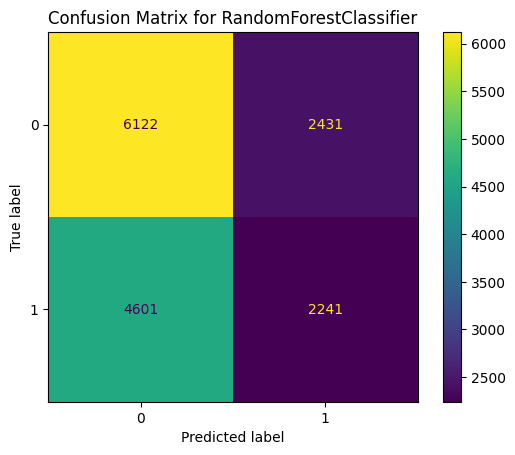

Classification Report for RandomForestClassifier:

              precision    recall  f1-score   support

         0.0       0.57      0.72      0.64      8553
         1.0       0.48      0.33      0.39      6842

    accuracy                           0.54     15395
   macro avg       0.53      0.52      0.51     15395
weighted avg       0.53      0.54      0.53     15395



In [19]:
# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Call the function to train and evaluate the model
y_pred_rf = train_and_evaluate_model(rf, X_train_scaled, y_train, X_val_scaled, y_val)


### 4. Gradient Boosting Models (XGBoost)

/home/datascience/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [12:05:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


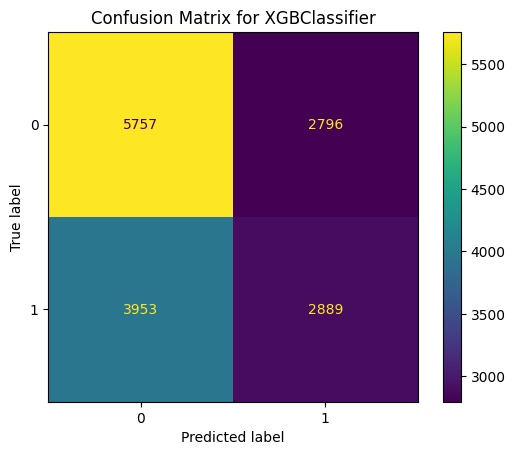

Classification Report for XGBClassifier:

              precision    recall  f1-score   support

         0.0       0.59      0.67      0.63      8553
         1.0       0.51      0.42      0.46      6842

    accuracy                           0.56     15395
   macro avg       0.55      0.55      0.55     15395
weighted avg       0.56      0.56      0.56     15395



In [20]:
# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Call the function to train and evaluate the model
y_pred_xgb = train_and_evaluate_model(xgb_model, X_train_scaled, y_train, X_val_scaled, y_val)

### 5. Support Vector Classifier (SVC): Model Evaluation

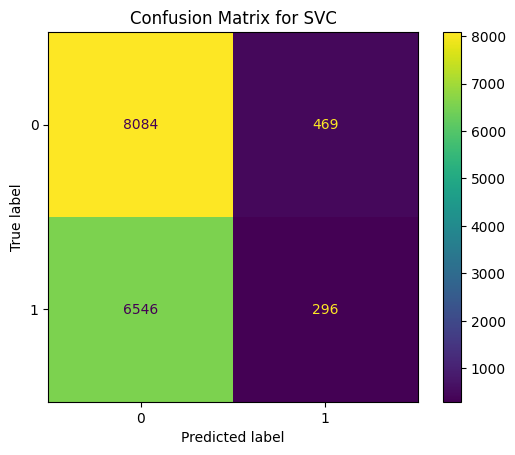

Classification Report for SVC:

              precision    recall  f1-score   support

         0.0       0.55      0.95      0.70      8553
         1.0       0.39      0.04      0.08      6842

    accuracy                           0.54     15395
   macro avg       0.47      0.49      0.39     15395
weighted avg       0.48      0.54      0.42     15395



In [21]:
# Initialize SVC
svc = SVC()

# Call the function to train and evaluate the model
y_pred_svc = train_and_evaluate_model(svc,  X_train_scaled, y_train, X_val_scaled, y_val)


### 6. K-Nearest Neighbors (KNN): Model Evaluation

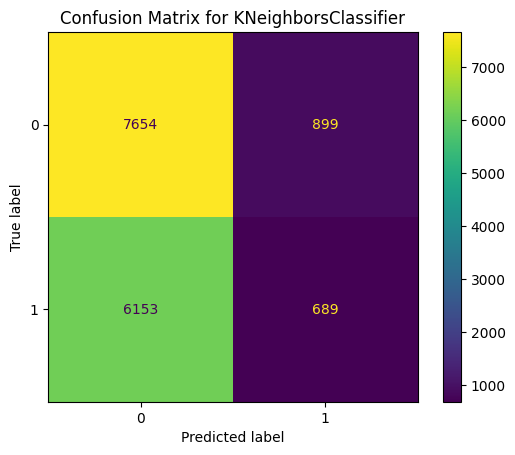

Classification Report for KNeighborsClassifier:

              precision    recall  f1-score   support

         0.0       0.55      0.89      0.68      8553
         1.0       0.43      0.10      0.16      6842

    accuracy                           0.54     15395
   macro avg       0.49      0.50      0.42     15395
weighted avg       0.50      0.54      0.45     15395



In [22]:
# Initialize the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Call the function to train and evaluate the model
y_pred_knn = train_and_evaluate_model(knn, X_train_scaled, y_train, X_val_scaled, y_val)

### 7. Artificial Neural Network (ANN): Model Evaluation

Epoch 1/100


/home/datascience/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2165/2165 ━━━━━━━━━━━━━━━━━━━━ 2s 500us/step - accuracy: 0.6445 - loss: 0.6332
Epoch 2/100
2165/2165 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - accuracy: 0.7206 - loss: 0.5485
Epoch 3/100
2165/2165 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.7450 - loss: 0.5177
Epoch 4/100
2165/2165 ━━━━━━━━━━━━━━━━━━━━ 1s 620us/step - accuracy: 0.7599 - loss: 0.4972
Epoch 5/100
2165/2165 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - accuracy: 0.7692 - loss: 0.4787
Epoch 6/100
2165/2165 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - accuracy: 0.7771 - loss: 0.4698
Epoch 7/100
2165/2165 ━━━━━━━━━━━━━━━━━━━━ 1s 430us/step - accuracy: 0.7836 - loss: 0.4552
Epoch 8/100
2165/2165 ━━━━━━━━━━━━━━━━━━━━ 2s 749us/step - accuracy: 0.7894 - loss: 0.4423
Epoch 9/100
2165/2165 ━━━━━━━━━━━━━━━━━━━━ 1s 359us/step - accuracy: 0.7967 - loss: 0.4330
Epoch 10/100
2165/2165 ━━━━━━━━━━━━━━━━━━━━ 1s 532us/step - accuracy: 0.8002 - loss: 0.4263
Epoch 11/100
2165/2165 ━━━━━━━━━━━━━━━━━━━━ 2s 853us/step - accuracy: 0.8044 - loss: 0.4188
Epoch 12/

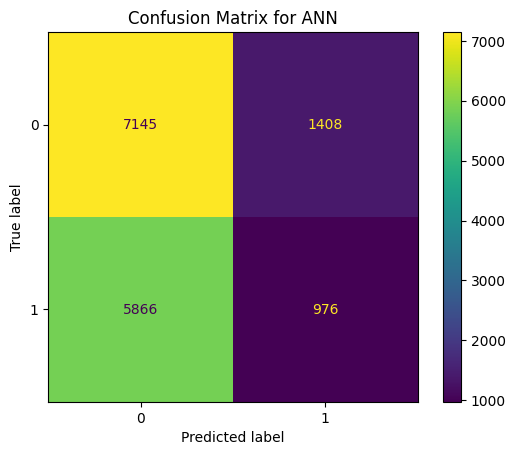

Classification Report for ANN:

              precision    recall  f1-score   support

         0.0       0.55      0.84      0.66      8553
         1.0       0.41      0.14      0.21      6842

    accuracy                           0.53     15395
   macro avg       0.48      0.49      0.44     15395
weighted avg       0.49      0.53      0.46     15395



In [23]:
# Initialize the Sequential Neural Network model
ann = Sequential()

# Add layers to the ANN
ann.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
ann.add(Dense(32, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

# Compile the model
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model on validation data
y_pred_ann = (ann.predict(X_val_scaled) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_ann)
ConfusionMatrixDisplay(cm).plot()
plt.title(f"Confusion Matrix for ANN")
plt.show()

# Classification Report
report = classification_report(y_val, y_pred_ann)
print(f"Classification Report for ANN:\n")
print(report)


# Model Performance Summary

## Confusion Matrices and Classification Reports

### 1. **Logistic Regression**
| Metric       | Precision (0) | Precision (1) | Recall (0) | Recall (1) | F1-Score (0) | F1-Score (1) | Accuracy |
|--------------|---------------|---------------|------------|------------|--------------|--------------|----------|
| **Logistic Regression** | 0.58          | 0.56          | 0.89       | 0.18       | 0.70         | 0.27         | 0.57     |

**Observation**: Logistic Regression has a high precision and recall for Class 0 but performs poorly for Class 1. The overall accuracy is moderate (57%).

---

### 2. **Decision Tree Classifier**
| Metric       | Precision (0) | Precision (1) | Recall (0) | Recall (1) | F1-Score (0) | F1-Score (1) | Accuracy |
|--------------|---------------|---------------|------------|------------|--------------|--------------|----------|
| **Decision Tree** | 0.62          | 0.46          | 0.20       | 0.84       | 0.30         | 0.59         | 0.49     |

**Observation**: Decision Tree focuses more on classifying Class 1 correctly, but sacrifices recall for Class 0. The overall accuracy is lower at 49%.

---

### 3. **Random Forest Classifier**
| Metric       | Precision (0) | Precision (1) | Recall (0) | Recall (1) | F1-Score (0) | F1-Score (1) | Accuracy |
|--------------|---------------|---------------|------------|------------|--------------|--------------|----------|
| **Random Forest** | 0.57          | 0.48          | 0.72       | 0.33       | 0.64         | 0.39         | 0.54     |

**Observation**: Random Forest provides a better balance between precision and recall for both classes, but Class 1 performance is still relatively poor.

---

### 4. **XGBoost Classifier**
| Metric       | Precision (0) | Precision (1) | Recall (0) | Recall (1) | F1-Score (0) | F1-Score (1) | Accuracy |
|--------------|---------------|---------------|------------|------------|--------------|--------------|----------|
| **XGBoost** | 0.59          | 0.51          | 0.67       | 0.42       | 0.63         | 0.46         | 0.56     |

**Observation**: XGBoost is slightly better than Random Forest, offering more balanced precision and recall, but still falls short on Class 1 performance.

---

### 5. **Support Vector Classifier (SVC)**
| Metric       | Precision (0) | Precision (1) | Recall (0) | Recall (1) | F1-Score (0) | F1-Score (1) | Accuracy |
|--------------|---------------|---------------|------------|------------|--------------|--------------|----------|
| **SVC**      | 0.55          | 0.39          | 0.95       | 0.04       | 0.70         | 0.08         | 0.54     |

**Observation**: SVC performs very well on Class 0 but extremely poorly on Class 1. This imbalance makes it unsuitable for this task where identifying Class 1 is important.

---

### 6. **K-Nearest Neighbors (KNN)**
| Metric       | Precision (0) | Precision (1) | Recall (0) | Recall (1) | F1-Score (0) | F1-Score (1) | Accuracy |
|--------------|---------------|---------------|------------|------------|--------------|--------------|----------|
| **KNN**      | 0.55          | 0.43          | 0.89       | 0.10       | 0.68         | 0.16         | 0.54     |

**Observation**: KNN has high recall for Class 0 but very low recall for Class 1, making it less effective for a balanced classification task.

---

### 7. **Artificial Neural Network (ANN)**
| Metric       | Precision (0) | Precision (1) | Recall (0) | Recall (1) | F1-Score (0) | F1-Score (1) | Accuracy |
|--------------|---------------|---------------|------------|------------|--------------|--------------|----------|
| **ANN**      | 0.55          | 0.41          | 0.84       | 0.14       | 0.66         | 0.21         | 0.53     |

**Observation**: ANN struggles with Class 1 recall, similarly to other models. Performance is better on Class 0, but not sufficient for Class 1 detection.

---

## Conclusion

- **Logistic Regression** and **XGBoost** both performed reasonably well in terms of overall accuracy and balance between precision and recall. However, they struggle with **Class 1 recall**, which is important when aiming to predict outperforming stocks.
- **Decision Tree** leans more towards predicting **Class 1** correctly but at the expense of Class 0 accuracy.
- **SVC** and **KNN** were highly biased towards Class 0 and performed poorly on Class 1.
- **Random Forest** was slightly better than KNN but showed similar bias.

### Recommendation:
- **XGBoost** seems to be the most balanced classifier in this analysis, given its ability to capture Class 1 reasonably well while maintaining good overall accuracy. Further fine-tuning and hyperparameter optimization could improve performance, especially focusing on increasing Class 1 recall.


# Now Let's try using SMOTE

In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

def preprocess_data(full_df, target_col='Outperform', drop_cols=['PRICE VAR [%]', 'class', 'symbol']):
    """
    Preprocess the dataset by splitting into training, validation, and test sets,
    applying SMOTE for class imbalance in the training set, and standardizing features with StandardScaler.
    
    Parameters:
    - full_df: pd.DataFrame, the full merged dataset
    - target_col: str, the target variable name ('Outperform')
    - drop_cols: list, columns to drop due to data leakage or irrelevance
    
    Returns:
    - X_train_smote_scaled, X_val_scaled, X_test_scaled: scaled feature matrices for train, validation, and test sets
    - y_train_smote, y_val, y_test: target variables for train, validation, and test sets
    - scaler: the StandardScaler object fitted on the training data
    """
    
    # Split the data by year ranges
    train_years = list(range(2000, 2017))
    val_years = [2017, 2018]
    test_years = list(range(2019, 2023))
    
    # Create train, validation, and test sets
    train_data = full_df[full_df['year'].isin(train_years)]
    val_data = full_df[full_df['year'].isin(val_years)]
    test_data = full_df[full_df['year'].isin(test_years)]
    
    print(f"Training data size: {train_data.shape}")
    print(f"Validation data size: {val_data.shape}")
    print(f"Test data size: {test_data.shape}")
    
    # Drop the columns that may cause data leakage and separate the target variable
    X_train = train_data.drop(columns=drop_cols + [target_col])
    y_train = train_data[target_col]
    
    X_val = val_data.drop(columns=drop_cols + [target_col])
    y_val = val_data[target_col]
    
    X_test = test_data.drop(columns=drop_cols + [target_col])
    y_test = test_data[target_col]
    
    # Apply SMOTE to the training data for handling class imbalance
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
    print(f"After SMOTE, training data size: {X_train_smote.shape}")
    
    # Standardize the features
    scaler = StandardScaler()
    X_train_smote_scaled = scaler.fit_transform(X_train_smote)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_smote_scaled, X_val_scaled, X_test_scaled, y_train_smote, y_val, y_test, scaler
    
# running the preprocessing
X_train_scaled, X_val_scaled, X_test_scaled, y_train_smote, y_val, y_test, scaler = preprocess_data(df)


Training data size: (69262, 227)
Validation data size: (15395, 227)
Test data size: (40242, 227)
After SMOTE, training data size: (87398, 223)


### 1. Logistic Regression: Model Evaluation

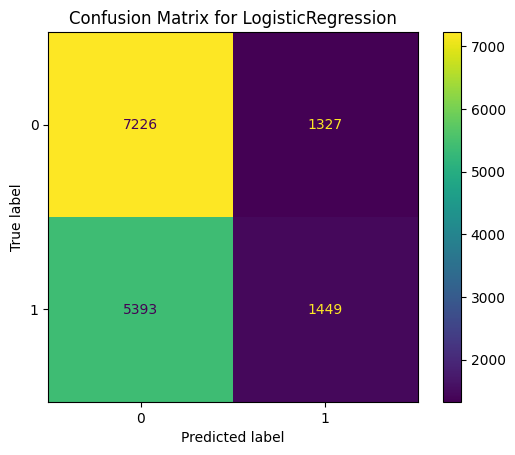

Classification Report for LogisticRegression:

              precision    recall  f1-score   support

         0.0       0.57      0.84      0.68      8553
         1.0       0.52      0.21      0.30      6842

    accuracy                           0.56     15395
   macro avg       0.55      0.53      0.49     15395
weighted avg       0.55      0.56      0.51     15395



In [30]:
# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Call the function to train and evaluate the model
y_pred_log_reg = train_and_evaluate_model(log_reg, X_train_scaled, y_train_smote, X_val_scaled, y_val)


### 2. Decision Tree Classifier: Model Evaluation


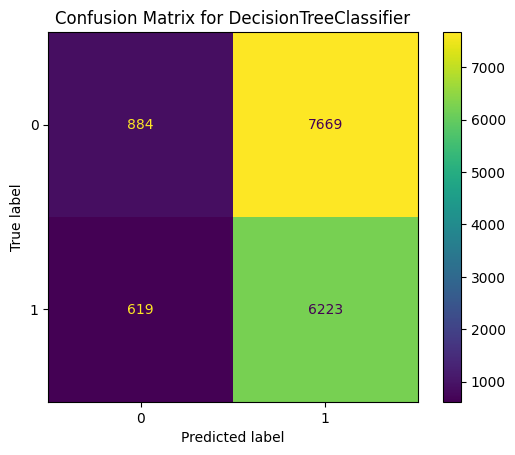

Classification Report for DecisionTreeClassifier:

              precision    recall  f1-score   support

         0.0       0.59      0.10      0.18      8553
         1.0       0.45      0.91      0.60      6842

    accuracy                           0.46     15395
   macro avg       0.52      0.51      0.39     15395
weighted avg       0.53      0.46      0.36     15395



In [31]:
# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Call the function to train and evaluate the model
y_pred_dt = train_and_evaluate_model(dt,  X_train_scaled, y_train_smote, X_val_scaled, y_val)

### 3. Random Forest Classifier: Model Evaluation


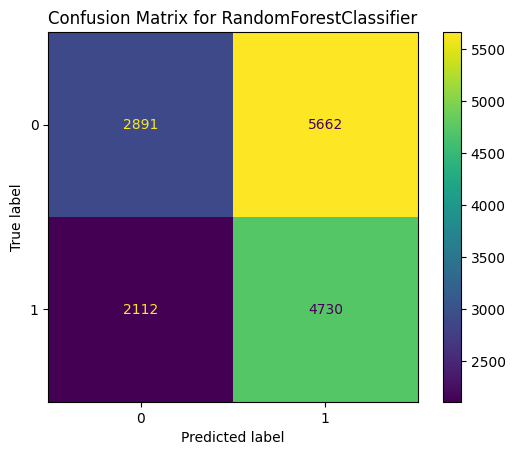

Classification Report for RandomForestClassifier:

              precision    recall  f1-score   support

         0.0       0.58      0.34      0.43      8553
         1.0       0.46      0.69      0.55      6842

    accuracy                           0.50     15395
   macro avg       0.52      0.51      0.49     15395
weighted avg       0.52      0.50      0.48     15395



In [32]:
# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Call the function to train and evaluate the model
y_pred_rf = train_and_evaluate_model(rf, X_train_scaled, y_train_smote, X_val_scaled, y_val)


### 4. Gradient Boosting Models (XGBoost)

/home/datascience/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [12:50:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


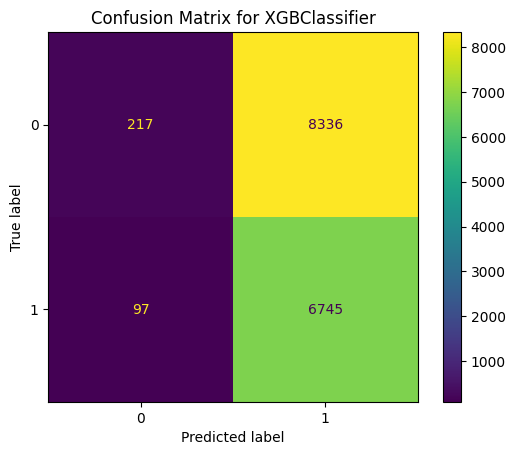

Classification Report for XGBClassifier:

              precision    recall  f1-score   support

         0.0       0.69      0.03      0.05      8553
         1.0       0.45      0.99      0.62      6842

    accuracy                           0.45     15395
   macro avg       0.57      0.51      0.33     15395
weighted avg       0.58      0.45      0.30     15395



In [33]:
# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Call the function to train and evaluate the model
y_pred_xgb = train_and_evaluate_model(xgb_model, X_train_scaled, y_train_smote, X_val_scaled, y_val)

### 5. Support Vector Classifier (SVC): Model Evaluation

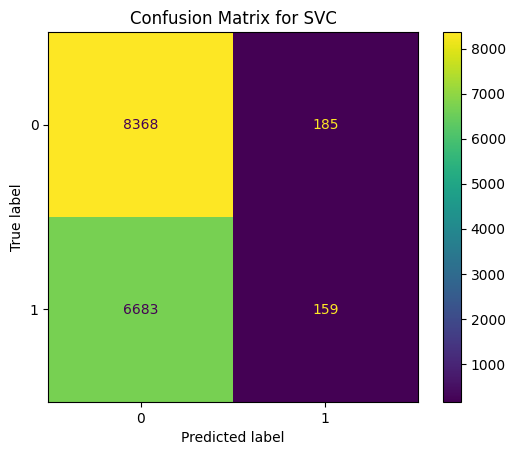

Classification Report for SVC:

              precision    recall  f1-score   support

         0.0       0.56      0.98      0.71      8553
         1.0       0.46      0.02      0.04      6842

    accuracy                           0.55     15395
   macro avg       0.51      0.50      0.38     15395
weighted avg       0.51      0.55      0.41     15395



In [34]:
# Initialize SVC
svc = SVC()

# Call the function to train and evaluate the model
y_pred_svc = train_and_evaluate_model(svc, X_train_scaled, y_train_smote, X_val_scaled, y_val)


### 6. K-Nearest Neighbors (KNN): Model Evaluation

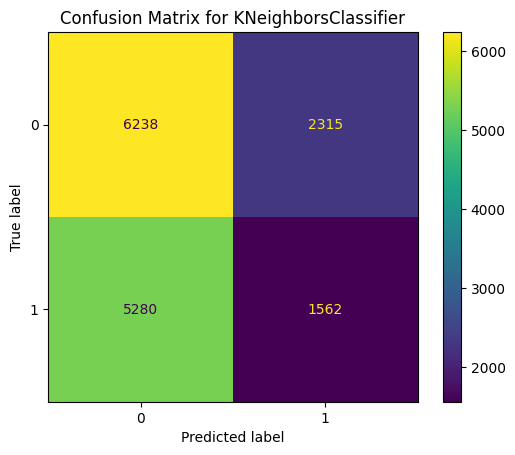

Classification Report for KNeighborsClassifier:

              precision    recall  f1-score   support

         0.0       0.54      0.73      0.62      8553
         1.0       0.40      0.23      0.29      6842

    accuracy                           0.51     15395
   macro avg       0.47      0.48      0.46     15395
weighted avg       0.48      0.51      0.47     15395



In [35]:
# Initialize the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Call the function to train and evaluate the model
y_pred_knn = train_and_evaluate_model(knn, X_train_scaled, y_train_smote, X_val_scaled, y_val)

### 7. Artificial Neural Network (ANN): Model Evaluation

Epoch 1/100


/home/datascience/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2732/2732 ━━━━━━━━━━━━━━━━━━━━ 2s 626us/step - accuracy: 0.6383 - loss: 0.6275
Epoch 2/100
2732/2732 ━━━━━━━━━━━━━━━━━━━━ 2s 562us/step - accuracy: 0.7362 - loss: 0.5060
Epoch 3/100
2732/2732 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.7608 - loss: 0.4758
Epoch 4/100
2732/2732 ━━━━━━━━━━━━━━━━━━━━ 2s 749us/step - accuracy: 0.7750 - loss: 0.4557
Epoch 5/100
2732/2732 ━━━━━━━━━━━━━━━━━━━━ 1s 516us/step - accuracy: 0.7880 - loss: 0.4368
Epoch 6/100
2732/2732 ━━━━━━━━━━━━━━━━━━━━ 2s 540us/step - accuracy: 0.7958 - loss: 0.4242
Epoch 7/100
2732/2732 ━━━━━━━━━━━━━━━━━━━━ 1s 498us/step - accuracy: 0.8044 - loss: 0.4111
Epoch 8/100
2732/2732 ━━━━━━━━━━━━━━━━━━━━ 2s 655us/step - accuracy: 0.8117 - loss: 0.3967
Epoch 9/100
2732/2732 ━━━━━━━━━━━━━━━━━━━━ 1s 373us/step - accuracy: 0.8175 - loss: 0.3915
Epoch 10/100
2732/2732 ━━━━━━━━━━━━━━━━━━━━ 2s 655us/step - accuracy: 0.8238 - loss: 0.3787
Epoch 11/100
2732/2732 ━━━━━━━━━━━━━━━━━━━━ 1s 358us/step - accuracy: 0.8275 - loss: 0.3732
Epoch 12/

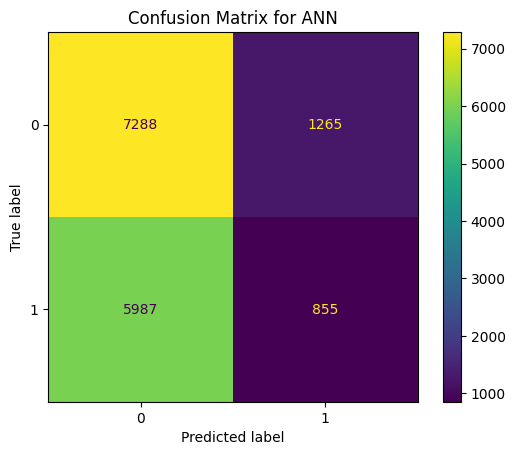

Classification Report for ANN:

              precision    recall  f1-score   support

         0.0       0.55      0.85      0.67      8553
         1.0       0.40      0.12      0.19      6842

    accuracy                           0.53     15395
   macro avg       0.48      0.49      0.43     15395
weighted avg       0.48      0.53      0.46     15395



In [36]:
# Initialize the Sequential Neural Network model
ann = Sequential()

# Add layers to the ANN
ann.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
ann.add(Dense(32, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

# Compile the model
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann.fit(X_train_scaled, y_train_smote, epochs=100, batch_size=32, verbose=1)

# Evaluate the model on validation data
y_pred_ann = (ann.predict(X_val_scaled) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_ann)
ConfusionMatrixDisplay(cm).plot()
plt.title(f"Confusion Matrix for ANN")
plt.show()

# Classification Report
report = classification_report(y_val, y_pred_ann)
print(f"Classification Report for ANN:\n")
print(report)


# Model Performance with SMOTE

## Logistic Regression:
- **Precision (0.0 class)**: 0.57
- **Recall (0.0 class)**: 0.84
- **F1-Score (0.0 class)**: 0.68
- **Precision (1.0 class)**: 0.52
- **Recall (1.0 class)**: 0.21
- **F1-Score (1.0 class)**: 0.30
- **Accuracy**: 0.56

### Conclusion:
Logistic regression has a better recall for class 0, meaning it predicts non-outperformers more reliably. However, its precision and recall for class 1 (outperformers) are low, making it less effective for predicting stocks that outperform the market.

---

## Decision Tree Classifier:
- **Precision (0.0 class)**: 0.59
- **Recall (0.0 class)**: 0.10
- **F1-Score (0.0 class)**: 0.18
- **Precision (1.0 class)**: 0.45
- **Recall (1.0 class)**: 0.91
- **F1-Score (1.0 class)**: 0.60
- **Accuracy**: 0.46

### Conclusion:
The decision tree classifier is biased towards class 1 (outperformers), resulting in high recall for class 1 but very poor precision and recall for class 0. It significantly overpredicts outperformers.

---

## Random Forest Classifier:
- **Precision (0.0 class)**: 0.58
- **Recall (0.0 class)**: 0.34
- **F1-Score (0.0 class)**: 0.43
- **Precision (1.0 class)**: 0.46
- **Recall (1.0 class)**: 0.69
- **F1-Score (1.0 class)**: 0.55
- **Accuracy**: 0.50

### Conclusion:
Random forest has a more balanced performance between the two classes, but overall accuracy is still moderate. It struggles with precision, particularly for class 1, but its recall is better than some other models.

---

## XGBoost Classifier:
- **Precision (0.0 class)**: 0.69
- **Recall (0.0 class)**: 0.03
- **F1-Score (0.0 class)**: 0.05
- **Precision (1.0 class)**: 0.45
- **Recall (1.0 class)**: 0.99
- **F1-Score (1.0 class)**: 0.62
- **Accuracy**: 0.45

### Conclusion:
XGBoost is strongly biased toward class 1. While it has an extremely high recall for class 1, its precision and recall for class 0 are very poor, resulting in overprediction of outperformers.

---

## K-Nearest Neighbors (KNN):
- **Precision (0.0 class)**: 0.54
- **Recall (0.0 class)**: 0.73
- **F1-Score (0.0 class)**: 0.62
- **Precision (1.0 class)**: 0.40
- **Recall (1.0 class)**: 0.23
- **F1-Score (1.0 class)**: 0.29
- **Accuracy**: 0.51

### Conclusion:
KNN performs moderately well for class 0 (non-outperformers) but struggles significantly with class 1 (outperformers), having low recall and precision.

---

## Support Vector Classifier (SVC):
- **Precision (0.0 class)**: 0.56
- **Recall (0.0 class)**: 0.98
- **F1-Score (0.0 class)**: 0.71
- **Precision (1.0 class)**: 0.46
- **Recall (1.0 class)**: 0.02
- **F1-Score (1.0 class)**: 0.04
- **Accuracy**: 0.55

### Conclusion:
SVC is strongly biased towards predicting non-outperformers, with a very high recall for class 0 but nearly nonexistent performance for class 1. This model is not suitable for predicting outperformers.

---

## Artificial Neural Network (ANN):
- **Precision (0.0 class)**: 0.55
- **Recall (0.0 class)**: 0.85
- **F1-Score (0.0 class)**: 0.67
- **Precision (1.0 class)**: 0.40
- **Recall (1.0 class)**: 0.12
- **F1-Score (1.0 class)**: 0.19
- **Accuracy**: 0.53

### Conclusion:
ANN performs better at predicting non-outperformers than outperformers. It has relatively high recall for class 0 but struggles with precision and recall for class 1.

---

## Summary of Performance:

| Model                     | Precision (0.0) | Recall (0.0) | F1-Score (0.0) | Precision (1.0) | Recall (1.0) | F1-Score (1.0) | Accuracy |
|----------------------------|-----------------|--------------|----------------|-----------------|--------------|----------------|----------|
| Logistic Regression         | 0.57            | 0.84         | 0.68           | 0.52            | 0.21         | 0.30           | 0.56     |
| Decision Tree Classifier    | 0.59            | 0.10         | 0.18           | 0.45            | 0.91         | 0.60           | 0.46     |
| Random Forest Classifier    | 0.58            | 0.34         | 0.43           | 0.46            | 0.69         | 0.55           | 0.50     |
| XGBoost Classifier          | 0.69            | 0.03         | 0.05           | 0.45            | 0.99         | 0.62           | 0.45     |
| K-Nearest Neighbors         | 0.54            | 0.73         | 0.62           | 0.40            | 0.23         | 0.29           | 0.51     |
| Support Vector Classifier   | 0.56            | 0.98         | 0.71           | 0.46            | 0.02         | 0.04           | 0.55     |
| Artificial Neural Network   | 0.55            | 0.85         | 0.67           | 0.40            | 0.12         | 0.19           | 0.53     |

### Final Remarks:
- Logistic Regression and Random Forest seem to offer the most balanced performance, but none of the models are particularly strong at predicting class 1 (outperformers).
- SVC and XGBoost heavily overpredict class 0, while Decision Tree overpredicts class 1.
- Balancing the dataset with SMOTE improves recall for class 1 but leads to lower precision for most models.


# Comparison using SMOTE and without applying SMOTE

# Model Performance Comparison: With vs. Without SMOTE

## 1. **Logistic Regression**

| Metric       | Precision (0) | Precision (1) | Recall (0) | Recall (1) | F1-Score (0) | F1-Score (1) | Accuracy |
|--------------|---------------|---------------|------------|------------|--------------|--------------|----------|
| **Without SMOTE** | 0.58          | 0.56          | 0.89       | 0.18       | 0.70         | 0.27         | 0.57     |
| **With SMOTE**    | 0.57          | 0.52          | 0.84       | 0.21       | 0.68         | 0.30         | 0.56     |

### Observations:
- **Without SMOTE**: High precision and recall for class 0 but poor recall for class 1.
- **With SMOTE**: Slight improvement in class 1 recall but no significant difference in overall accuracy.

---

## 2. **Decision Tree Classifier**

| Metric       | Precision (0) | Precision (1) | Recall (0) | Recall (1) | F1-Score (0) | F1-Score (1) | Accuracy |
|--------------|---------------|---------------|------------|------------|--------------|--------------|----------|
| **Without SMOTE** | 0.62          | 0.46          | 0.20       | 0.84       | 0.30         | 0.59         | 0.49     |
| **With SMOTE**    | 0.59          | 0.45          | 0.10       | 0.91       | 0.18         | 0.60         | 0.46     |

### Observations:
- **Without SMOTE**: Better balance between classes but still biased toward class 1.
- **With SMOTE**: Slight decrease in precision for both classes and a significant drop in recall for class 0.

---

## 3. **Random Forest Classifier**

| Metric       | Precision (0) | Precision (1) | Recall (0) | Recall (1) | F1-Score (0) | F1-Score (1) | Accuracy |
|--------------|---------------|---------------|------------|------------|--------------|--------------|----------|
| **Without SMOTE** | 0.57          | 0.48          | 0.72       | 0.33       | 0.64         | 0.39         | 0.54     |
| **With SMOTE**    | 0.58          | 0.46          | 0.34       | 0.69       | 0.43         | 0.55         | 0.50     |

### Observations:
- **Without SMOTE**: Better recall for class 0.
- **With SMOTE**: Balanced recall between both classes but lower precision for class 1.

---

## 4. **XGBoost Classifier**

| Metric       | Precision (0) | Precision (1) | Recall (0) | Recall (1) | F1-Score (0) | F1-Score (1) | Accuracy |
|--------------|---------------|---------------|------------|------------|--------------|--------------|----------|
| **Without SMOTE** | 0.59          | 0.51          | 0.67       | 0.42       | 0.63         | 0.46         | 0.56     |
| **With SMOTE**    | 0.69          | 0.45          | 0.03       | 0.99       | 0.05         | 0.62         | 0.45     |

### Observations:
- **Without SMOTE**: XGBoost performs better than Random Forest in balancing precision and recall across classes.
- **With SMOTE**: Significant bias toward class 1, with very poor recall for class 0, reducing overall accuracy.

---

## 5. **K-Nearest Neighbors (KNN)**

| Metric       | Precision (0) | Precision (1) | Recall (0) | Recall (1) | F1-Score (0) | F1-Score (1) | Accuracy |
|--------------|---------------|---------------|------------|------------|--------------|--------------|----------|
| **Without SMOTE** | 0.55          | 0.43          | 0.89       | 0.10       | 0.68         | 0.16         | 0.54     |
| **With SMOTE**    | 0.54          | 0.40          | 0.73       | 0.23       | 0.62         | 0.29         | 0.51     |

### Observations:
- **Without SMOTE**: High recall for class 0, low recall for class 1.
- **With SMOTE**: Slight improvement in class 1 recall but lower recall for class 0, resulting in overall lower accuracy.

---

## 6. **Support Vector Classifier (SVC)**

| Metric       | Precision (0) | Precision (1) | Recall (0) | Recall (1) | F1-Score (0) | F1-Score (1) | Accuracy |
|--------------|---------------|---------------|------------|------------|--------------|--------------|----------|
| **Without SMOTE** | 0.55          | 0.39          | 0.95       | 0.04       | 0.70         | 0.08         | 0.54     |
| **With SMOTE**    | 0.56          | 0.46          | 0.98       | 0.02       | 0.71         | 0.04         | 0.55     |

### Observations:
- **Without SMOTE**: Extremely biased toward class 0.
- **With SMOTE**: Slight improvement in precision for class 1 but still heavily biased toward class 0.

---

## 7. **Artificial Neural Network (ANN)**

| Metric       | Precision (0) | Precision (1) | Recall (0) | Recall (1) | F1-Score (0) | F1-Score (1) | Accuracy |
|--------------|---------------|---------------|------------|------------|--------------|--------------|----------|
| **Without SMOTE** | 0.55          | 0.41          | 0.84       | 0.14       | 0.66         | 0.21         | 0.53     |
| **With SMOTE**    | 0.55          | 0.40          | 0.85       | 0.12       | 0.67         | 0.19         | 0.53     |

### Observations:
- **Without SMOTE**: Moderate recall for class 0, but poor for class 1.
- **With SMOTE**: No significant change in performance after applying SMOTE.

---

## Conclusion:

- **Logistic Regression** and **Random Forest** show some improvement in class 1 recall with SMOTE but at the cost of precision for class 0.
- **Decision Tree** and **XGBoost** become heavily biased toward class 1 after applying SMOTE, resulting in poor performance for class 0.
- **SVC** and **KNN** remain biased toward class 0, even with SMOTE.
- **ANN** does not show significant improvement with SMOTE.

### Final Recommendation:
SMOTE helps slightly in improving class 1 recall but introduces bias in many models, especially Decision Tree and XGBoost. **Random Forest** and **Logistic Regression** seem to benefit the most from SMOTE, with better balance between precision and recall. Further fine-tuning of hyperparameters might yield better results.


Next Steps for Fine-Tuning:
Random Forest, Logistic Regression.
